In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential  #모델 만들기
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  #레이어 쌓기
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy, mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model, Model

In [26]:
(X_data,y_data), (tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()
s_X_data = X_data.reshape(-1,28,28,1)/255.0 #이미지는 3차원 데이터. 미리 reshape하고 스케일
s_tt_x = tt_x.reshape(-1,28,28,1) / 255.0

In [27]:
s_X_data.shape, s_tt_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
t_x, v_x, t_y, v_y = train_test_split(s_X_data, y_data, random_state=42, test_size = 0.2)

In [30]:
m = Sequential()

In [31]:
#컨볼루션 -> 사진개수 늘어남, 풀링 -> 사이즈 줄어듦
m.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape = (28,28,1)))
#커널(필터)의 개수, 사이즈(ex. 3이면 3*3 사이즈) 설정, 컨볼루션하고난 후의 이미지 크기 처리 방법
m.add(MaxPooling2D(2)) #사이즈
m.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
#
m.add(MaxPooling2D(2))

In [32]:
m.add(Flatten()) #컨볼루션 층에서 알아서 받아줄 것이기 때문에 input_shape 설정을 안 했다.
m.add(Dense(100, activation='relu')) #이미지에서 일반적으로 활성화함수를 relu로 쓴다
m.add(Dropout(0.3))
m.add(Dense(10, activation='softmax')) #다중클래스분류 softmax
m.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

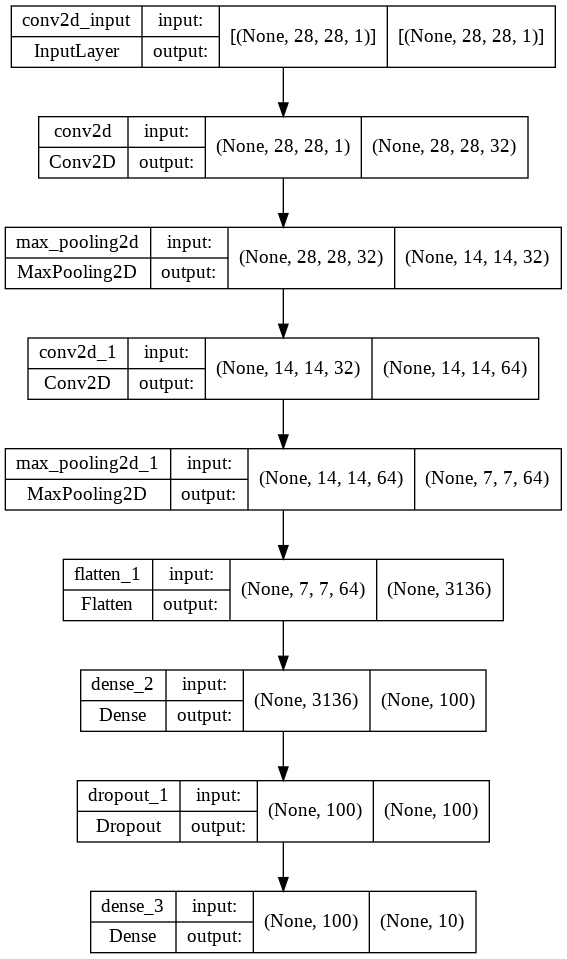

In [16]:
keras.utils.plot_model(m, show_shapes=True)

In [35]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
es = EarlyStopping(patience=2, restore_best_weights=True)
ck_p = ModelCheckpoint('best_m.h5')
hy = m.fit(t_x, t_y, validation_data=[v_x, v_y], callbacks = [es, ck_p], epochs = 100)

Epoch 1/100
1500/1500 [==============================] - 67s 44ms/step - loss: 0.3559 - accuracy: 0.8721 - val_loss: 0.2882 - val_accuracy: 0.8888
Epoch 2/100
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2912 - accuracy: 0.8939 - val_loss: 0.2707 - val_accuracy: 0.9029
Epoch 3/100
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2575 - accuracy: 0.9063 - val_loss: 0.2508 - val_accuracy: 0.9047
Epoch 4/100
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2288 - accuracy: 0.9159 - val_loss: 0.2302 - val_accuracy: 0.9154
Epoch 5/100
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2104 - accuracy: 0.9234 - val_loss: 0.2302 - val_accuracy: 0.9161
Epoch 6/100
1500/1500 [==============================] - 65s 44ms/step - loss: 0.1903 - accuracy: 0.9285 - val_loss: 0.2207 - val_accuracy: 0.9190
Epoch 7/100
1500/1500 [==============================] - 67s 44ms/step - loss: 0.1748 - accuracy: 0.9347 - val_loss: 0

In [45]:
hy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

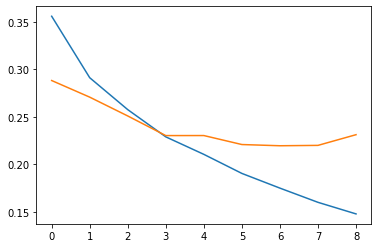

In [46]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()

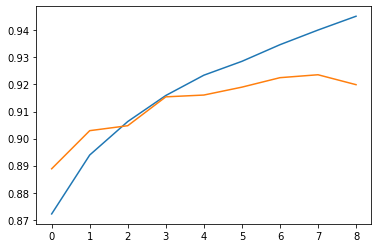

In [47]:
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])

In [23]:
m.evaluate(tt_x, tt_y)

313/313 [==============================] - 4s 14ms/step - loss: 0.2400 - accuracy: 0.9147


[0.24004484713077545, 0.9146999716758728]

In [44]:
d = m.predict(X_data[0].reshape(-1,28,28,1)/255.0)
d

array([[5.7149785e-10, 4.2910966e-13, 1.0051927e-10, 7.8441511e-09,
        6.9504955e-14, 1.5740139e-07, 3.0261499e-10, 4.3439225e-04,
        1.2076603e-11, 9.9956542e-01]], dtype=float32)

In [ ]:
#def answer(Xdata):
#    정답=np.array(['티셔츠','바지','스웨터','드레스','코트','샌들',''])

In [25]:
#np.argmax(d) #max의 인덱스를 반환

9

In [ ]:
#classes = ['x]

In [49]:
ck_m = load_model('best_m.h5')
ck_m.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [57]:
ck_m.layers[2].weights[0].shape

TensorShape([3, 3, 32, 64])

In [59]:
l0_d = ck_m.layers[0].weights[0].numpy()

In [66]:
ck_m.layers[0].weights[0].shape

TensorShape([3, 3, 1, 32])

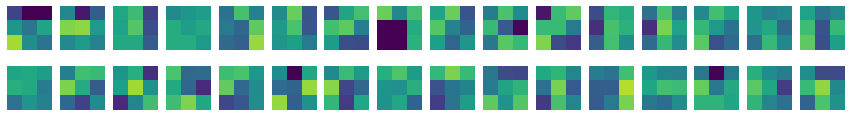

In [63]:
fg, ax = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        ax[i,j].imshow(l0_d[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        ax[i,j].axis('off')
plt.show()
#데이터 학습을 한 후의 필터(가중치 표현)

In [64]:
l2_d = ck_m.layers[2].weights[0].numpy()

In [65]:
ck_m.layers[2].weights[0].shape #필터 하나의 차원이 높아서 일반적인 시각화 툴로는 보기 어렵다.

TensorShape([3, 3, 32, 64])

In [ ]:
#위에서 만든 모델
m

In [68]:
from tensorflow.keras.models import Model
c1_t=Model(m.input,m.layers[0].output) 
#첫 번쩌 컨볼루션 지나기 전의 입력, 첫 번째 컨볼루션 레이어의 결과값만 가지고 오는 모델(?)

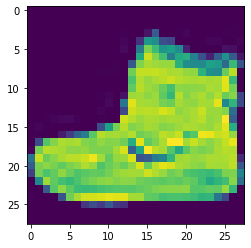

In [69]:
plt.imshow(X_data[0])

In [70]:
ipt_d = X_data[:1].reshape(-1,28,28,1)/255.0
c1_o = c1_t.predict(ipt_d)

In [71]:
c1_o.shape

(1, 28, 28, 32)

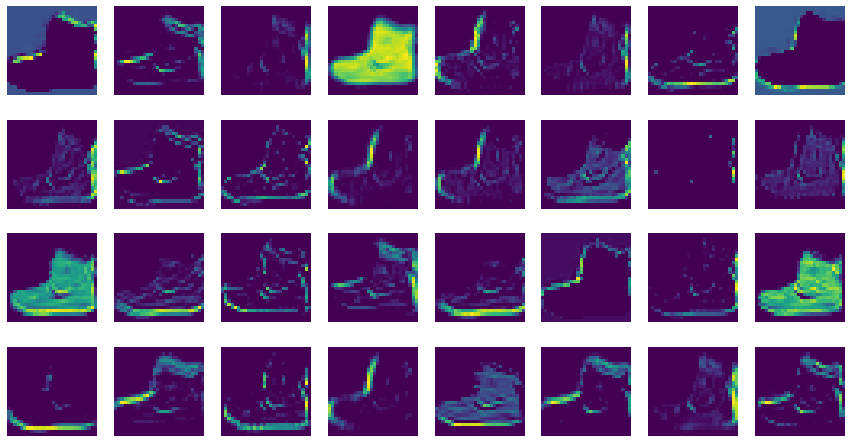

In [75]:
fg, ax = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        ax[i,j].imshow(c1_o[0,:,:,i*8+j])
        ax[i,j].axis('off')
plt.show()

In [77]:
c2_t=Model(m.input,m.layers[2].output)
ipt_d = X_data[:1].reshape(-1,28,28,1)/255.0
c2_o = c2_t.predict(ipt_d)
c2_o.shape

(1, 14, 14, 64)

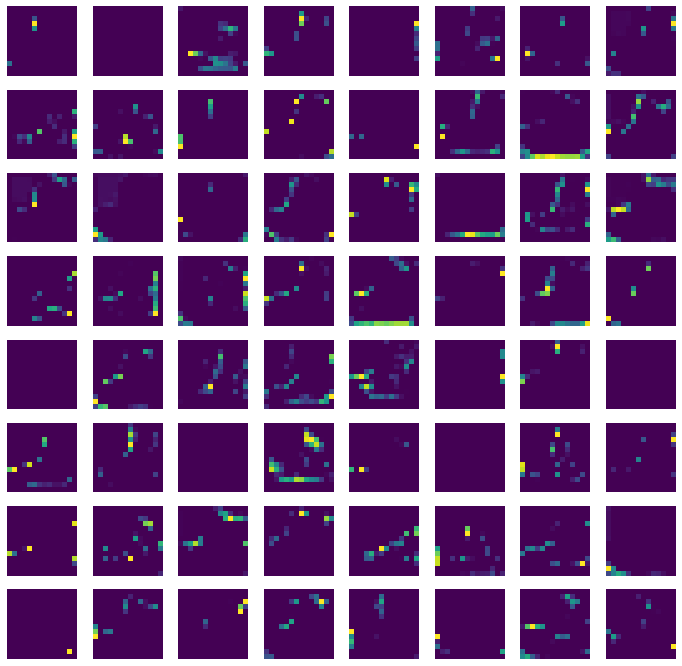

In [78]:
fg, ax = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(c2_o[0,:,:,i*8+j])
        ax[i,j].axis('off')
plt.show()